# Q1: The stock market

In [14]:
import random
import numpy as np
from numba import njit
import timeit

def market(stato, stato_cont, N):
    """Python version"""
    for _ in range(N):
        p = random.uniform(0, 1)
        if stato == 0:  # Bull
            if p > 0.9 and p <= 0.975:
                stato = 1
            elif p > 0.975:
                stato = 2
        elif stato == 1:  # Bear
            if p > 0.8 and p <= 0.95:
                stato = 0
            elif p > 0.95:
                stato = 2
        elif stato == 2:  # Recession
            if p > 0.5 and p <= 0.75:
                stato = 0
            elif p > 0.75:
                stato = 1
        stato_cont[stato] += 1
    for i in range(len(stato_cont)):
        stato_cont[i] /= N

@njit
def market_numba(stato, stato_cont, N):
    """Numba version"""
    for _ in range(N):
        p = np.random.uniform(0, 1)
        if stato == 0:
            if p > 0.9 and p <= 0.975:
                stato = 1
            elif p > 0.975:
                stato = 2
        elif stato == 1:
            if p > 0.8 and p <= 0.95:
                stato = 0
            elif p > 0.95:
                stato = 2
        elif stato == 2:
            if p > 0.5 and p <= 0.75:
                stato = 0
            elif p > 0.75:
                stato = 1
        stato_cont[stato] += 1
    for i in range(len(stato_cont)):
        stato_cont[i] /= N


N = 10000
stato = random.randint(0, 2)

# --- Python version ---
counts = [0., 0., 0.]
start = timeit.default_timer()
market(stato, counts, N)
end = timeit.default_timer()
print("Python version time:", end - start)
print("Counts:", counts)

# --- Numba version ---
counts_numba = np.zeros(3) 
start = timeit.default_timer()
market_numba(stato, counts_numba, N)
end = timeit.default_timer()
print("Numba version time:", end - start)
print("Counts:", counts_numba)

 



Python version time: 0.005467083014082164
Counts: [0.622, 0.3105, 0.0675]
Numba version time: 0.12693937501171604
Counts: [0.6226 0.3156 0.0618]


# Q2: Consistent plotting

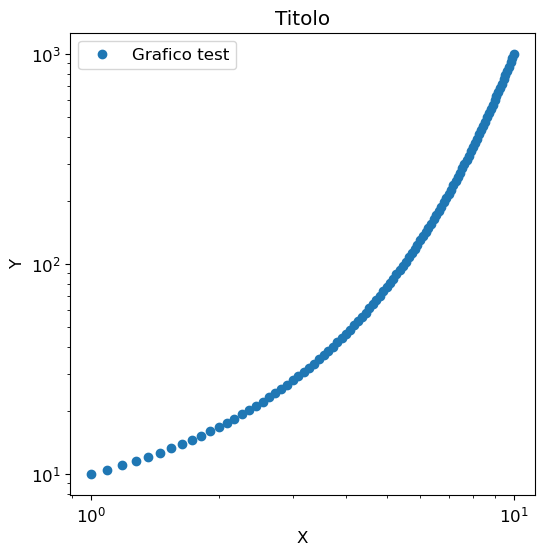

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def myplot(grafico):
    def wrapper():
       
        plt.rcParams.update({'font.size': 12, 'figure.figsize': (6, 6)})
        
       
        fig = grafico()
        
    
        plt.savefig("plot.pdf", format="pdf")
        #plt.show()
        plt.close(fig)
        
        return fig
    return wrapper


@myplot  
def grafico():
   
    x = np.linspace(1, 10, 100)  
    y = np.logspace(1, 3, 100) 

    
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label="Grafico test")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title("Titolo")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    
    return fig


grafico()
